# Using the PESCy module

Import the PESCy module if you have it installed already, get the source code from https://github.com/dschaffner/PESCy, or install it using 
```Python
pip install git+https://github.com/dschaffner/PESCy
```

In [1]:
import PESCy

Let's first generate some time series to use the PESCy technique on. Let's make a sine wave timeseries, a noise timeseries and a chaotic timeseries. First, define an array range of 10000 elements scaled to 1000:
```Python
import numpy as np
x = np.arange(10000)*0.001
```
Then, define a sine wave as
```Python
sinewave=np.sin(2*np.pi*x)
```


In [2]:
import numpy as np
x=np.arange(10000)*0.001
sinewave=np.sin(2*np.pi*x)

Let's plot it really quick to see what it looks like. Don't forget to import ```matplotlib.pylab```. You'll also probably want to zoom in your plot along the x-axis to be able to see anything.

(0.0, 10.0)

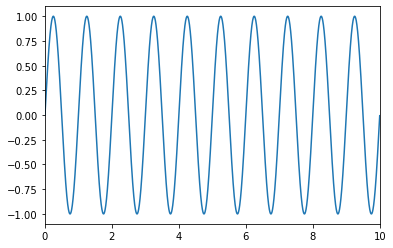

In [3]:
import matplotlib.pylab as plt
plt.plot(x,sinewave)
plt.xlim(0,10)

Good, now let's make a noise time series. We'll use numpy's random function:
```Python
rand_arr = np.random.random(10000)
```
Plot it as well as a function of x from above. Zoom in to 0,0.1 to be able to see the fluctuations well. Note that every time you run the random() function, you'll get a new random array.

(0.0, 0.1)

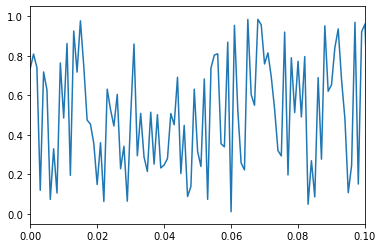

In [4]:
noise_arr = np.random.random(10000)
plt.plot(x,noise_arr)
plt.xlim(0,0.1)

Finally, let's make some chaotic time series. The PESCy module has a few versions built in. Some are baseed on an iterative map (Henon, Tent, Logistic) while others are solutions to differential equations (Lorenz). For this tutorial, we'll just use a Henon map. Generate a Henon map of 10000 elements using the followin function:
```Python
henon=PESCy.timeseries.generateHenon(10000)
```
As usual, plot it as a function of x, and pick a narrow range to display so you can see the features of the timeseries.

In [5]:
henon=PESCy.timeseries.generateHenon(10000)

(0.0, 0.1)

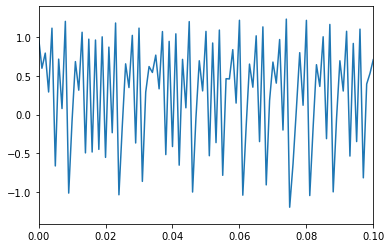

In [6]:
plt.plot(x,henon)
plt.xlim(0,0.1)

Now we can start running our PESC analysis on the timeseries we generated. We going to start by using an embedding dimension of $n=5$ and an embedding delay of $\tau=1$. Let's start computing the normalized Permutation Entropy, $H$, of the sine wave. We'll use the function ```calcH()``` which takes as arguments the timeseries array, the embedding dimension, and the embedding delay. We write:
```Python
sine_H = PESCy.PESCy_functions.calcH(sinewave,n=5,delay=1)
sine_H
```


In [7]:
sine_H = PESCy.PESCy_functions.calcH(sinewave,n=5,delay=1)
sine_H

Number of permutations =  9996


(0.15424838905940455, 0.7108389948305723)

The function reports back two numbers, actually. The first is the one we want, the normalized permutation entroy, $H$. The second is the a number needed for later functions. Note that the value of $H$ for a pure sine wave is fairly low, but not zero. This is because even a simple sine wave exhibits more than 1 ordinal pattern at this time scale. Now try computing the values of $H$ for the noise timeseries and the Henon map. The value for $H$ should be near 1 for the noise and somewhere in between the sine wave and the noise for the Henon map.

In [8]:
noise_H = PESCy.PESCy_functions.calcH(noise_arr,n=5,delay=1)
noise_H

Number of permutations =  9996


(0.9982620294922376, 0.9995681457704709)

We can now calculate the statistical complexity, $C$, for each timeseries. We'll use the function ```calcCofH()``` which uses the same arguments. In fact, the function calls ```calcH``` in it. The function returns now, the ordered pair of permutation entropy and statistical complexity, that can then be used as coordinates on the CH-plane. 

In [17]:
henonCH = PESCy.PESCy_functions.calcCofH(henon,n=5,delay=1)
henonCH
noiseCH = PESCy.PESCy_functions.calcCofH(noise_arr,n=5,delay=1)
noiseCH
sineCH = PESCy.PESCy_functions.calcCofH(sinewave,n=5,delay=1)
sineCH

Number of permutations =  9996
Number of permutations =  9996
Number of permutations =  9996


(0.15424838905940455, 0.14759515214302138)

Let's now make a CH plane to view these three points using the function
```Python
PESCy.PESCy_functions.generateCurves()
```
This will generate a blank CH plane.

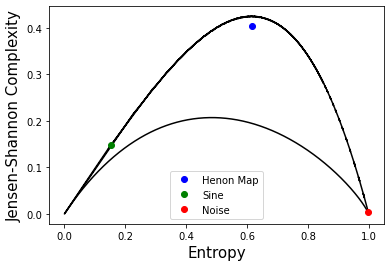

In [19]:
PESCy.PESCy_functions.generateCurves()
plt.plot(henonCH[0],henonCH[1],linestyle='',marker='o',color='blue',label='Henon Map')
plt.plot(sineCH[0],sineCH[1],linestyle='',marker='o',color='green',label='Sine')
plt.plot(noiseCH[0],noiseCH[1],linestyle='',marker='o',color='red',label='Noise')
plt.legend(loc='lower center')

Now in the same cell above, right after the ```generateCurves()``` function, add code to plot the coordinates of each of the time series. Something like this:
```Python
plt.plot(henonCH[0],henonCH[1],linestyle='',marker='o',color='blue',label='Henon Map')
plt.plot(sineCH[0],sineCH[1],linestyle='',marker='o',color='green',label='Sine')
plt.plot(noiseCH[0],noiseCH[1],linestyle='',marker='o',color='red',label='Noise')
```
Add a lengend at the bottom with ```plt.legend(loc='lower center')```